In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn
import os
from datetime import datetime, timedelta
import datetime as dt
from scipy import signal
os.chdir(r'C:\a_sem_i\PiPG_I\KOLOKWIUM')

In [126]:
def p_lr_red(X,Y):
    ''' Stworzenie modelu regresji i redukcja danych'''
    lr = LinearRegression()
    X = X.reshape(-1,1)
    lr.fit(X = X, y = Y)
    values_predict = lr.predict(X)
    Y_plot = signal.detrend(Y)
    
    plt.figure(figsize=(12,6))
    plt.title('Wykres danych wejściowych')
    plt.xlabel('t')
    plt.ylabel('value')
    plt.scatter(X,Y, color = 'blue', s = 0.2)
    plt.plot(X,values_predict, color = 'r')
    plt.grid()
    plt.show()
    
    
    plt.figure(figsize=(20,10))
    plt.title('Wykres po redukcji')
    plt.xlabel('t')
    plt.ylabel('value')
#     plt.xlim(400,900)
#     plt.xticks(np.arange(400,901,10))
    plt.scatter(X,Y_plot, color = 'blue', s = 1)
    plt.plot(X,np.linspace(0,0,len(X)), color = 'r')
    plt.grid()
    plt.show()
    print('-'*70)
    print('PARAMETRY MODELU REGRESJI')
    print(lr.coef_) # slope(tg(alfa))
    print(lr.intercept_)
    print('-'*70)
    
    # Operator róznicowy
    Y_r = np.array([y-x for x,y in zip(Y_plot,Y_plot[1:])])
    X_r = np.arange(1,len(Y_r)+1)
    ds = pd.Series(Y_r, index = X_r)
    
    plt.figure(figsize=(12,6))
    plt.title('operator róznicowy')
    plt.xlabel('t')
    plt.ylabel('value')
    plt.plot(X[1:],Y_r,'-', color = 'blue', linewidth = 0.1)
    plt.scatter(X[1:],Y_r, color = 'red', s = 5)
    plt.plot(X,np.linspace(0,0,len(X)), color = 'r')
    plt.grid()
    
    plt.show()
    print('-'*70)
    print('WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY')
    print(ds.where(ds==ds.max()).dropna())
    print(ds.where(ds==ds.min()).dropna())
    print('-'*70)
    
    return Y_plot, values_predict
    

def przesuniecie(X,Y_plot,prs):
    # Operator róznicowy z przesunieciem
    Y_r = np.array([y-x for x,y in zip(Y_plot,Y_plot[prs:])])
    X_r = np.arange(prs,len(Y))
    #ds = pd.Series(Y_r, index = X_r)

    plt.figure(figsize=(12,6))
    plt.title('operator róznicowy z przesunieciem')
    plt.xlabel('t')
    plt.ylabel('value')
    #plt.xlim(460,1000)
    plt.plot(X[prs:],Y_r,'-', color = 'blue', linewidth = 0.1)
    plt.scatter(X[prs:],Y_r, color = 'red', s = 5)
    plt.plot(X[prs:],np.linspace(0,0,len(X)-prs), color = 'r')
    plt.grid()
    plt.show()
    print('-'*70)
    print('WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY')
    print(ds.where(ds==ds.max()).dropna())
    print(ds.where(ds==ds.min()).dropna())
    print('-'*70)
    
def limit(xmin,xmax, Y_plot, X):
    plt.figure(figsize=(20,10))
    plt.title('Wykres po redukcji')
    plt.xlabel('t')
    plt.ylabel('value')
    plt.xlim(xmin,xmax)
    plt.xticks(np.arange(xmin,xmax,(xmax-xmin)/20))
    plt.scatter(X,Y_plot, color = 'blue', s = 1)
    plt.plot(X,np.linspace(0,0,len(X)), color = 'r')
    plt.grid()
    plt.show()

In [127]:
Y1 = np.loadtxt('0008b-19.txt')
X1 = np.arange(0,len(Y1))
# test2 = np.loadtxt('test_j1.txt')
# t_t2 = np.arange(0,len(test2))

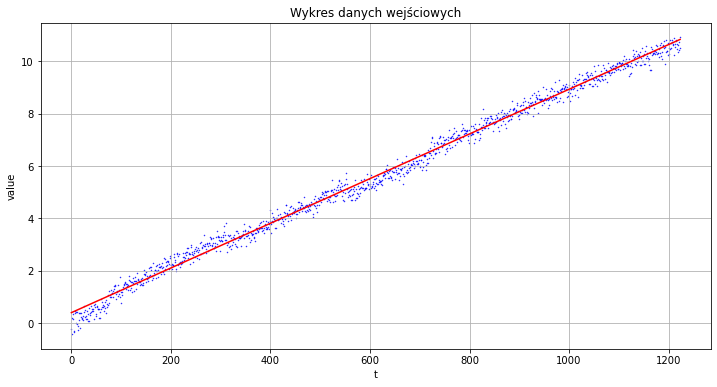

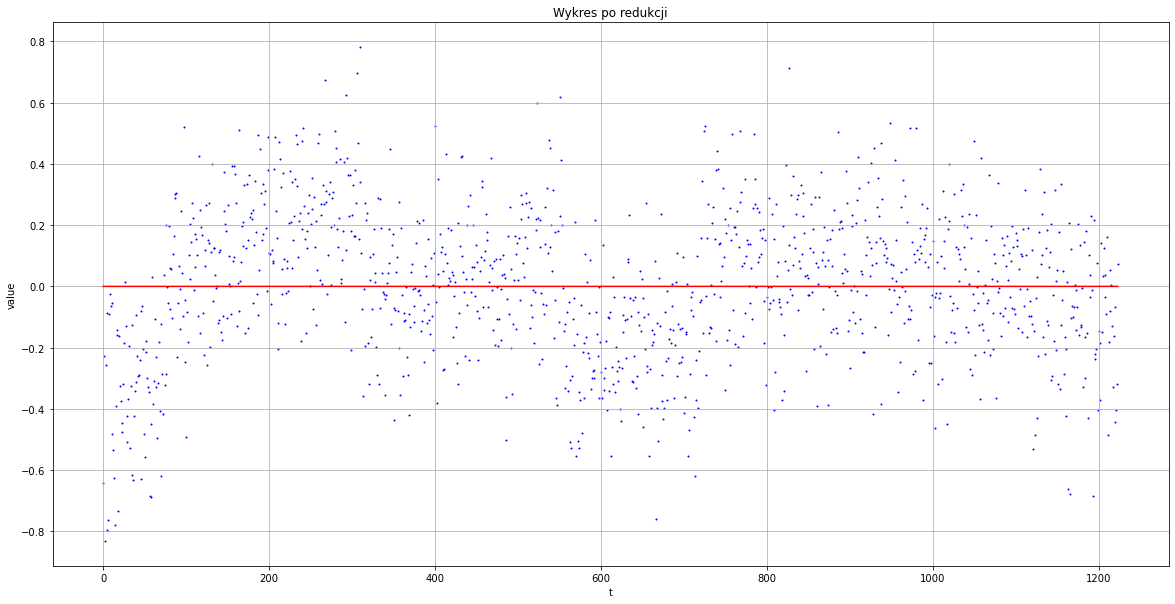

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[0.00853065]
0.4034498636876904
----------------------------------------------------------------------


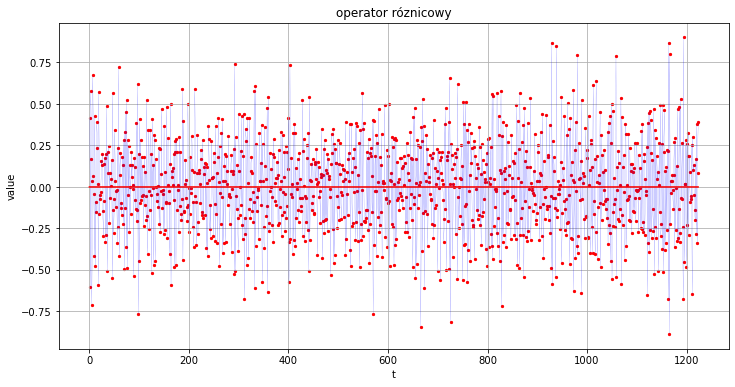

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
1194    0.900741
dtype: float64
1165   -0.885994
dtype: float64
----------------------------------------------------------------------


In [128]:
Y_plot, values_predict = p_lr_red(X1,Y1)

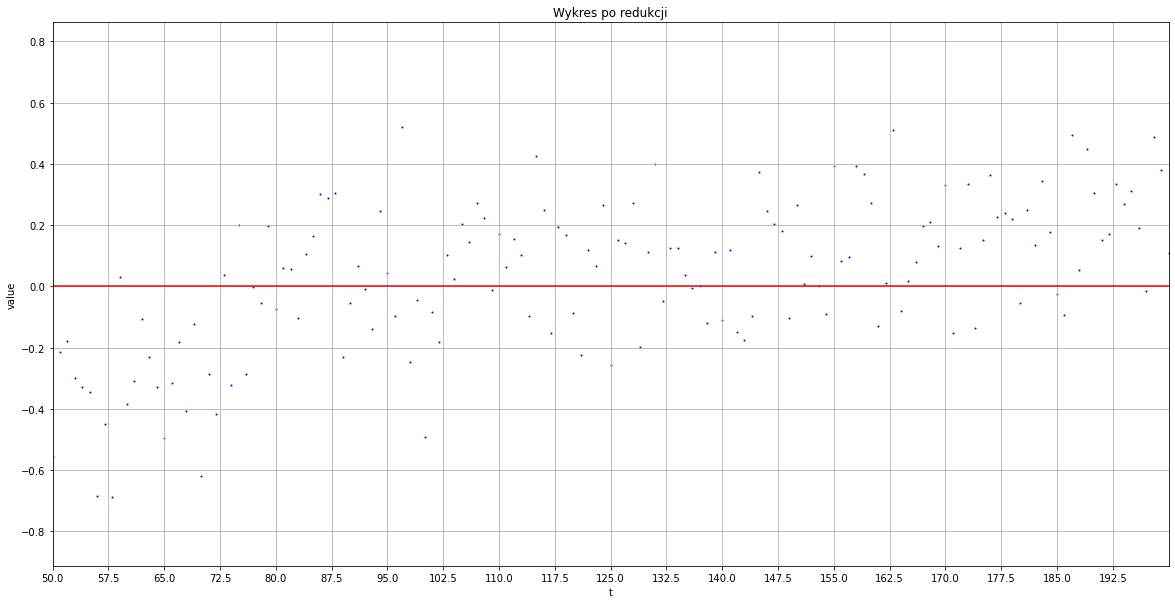

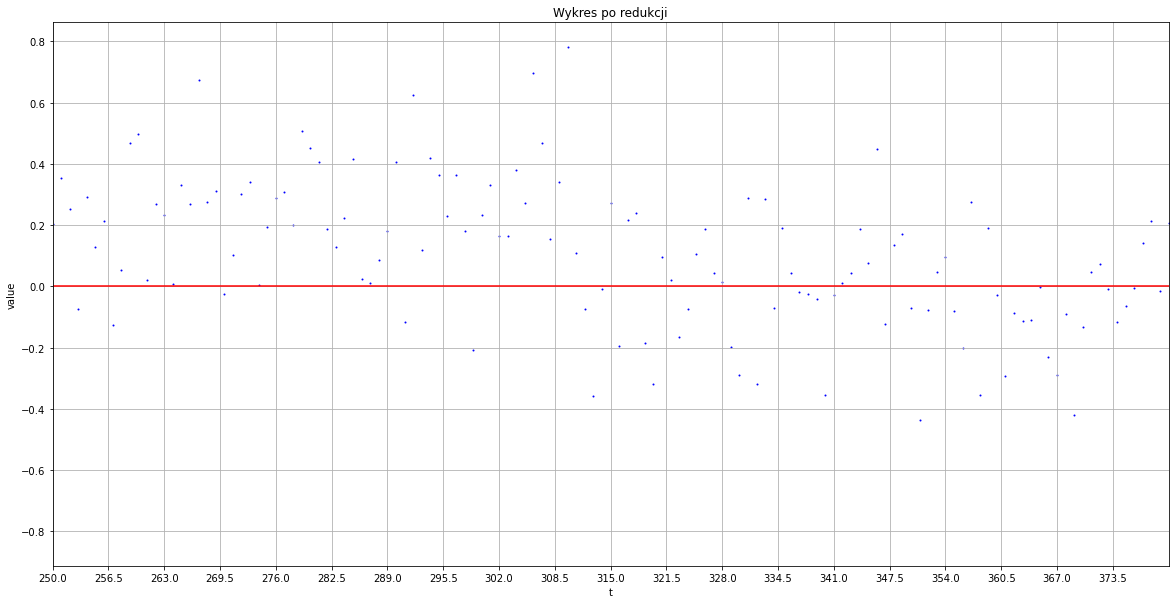

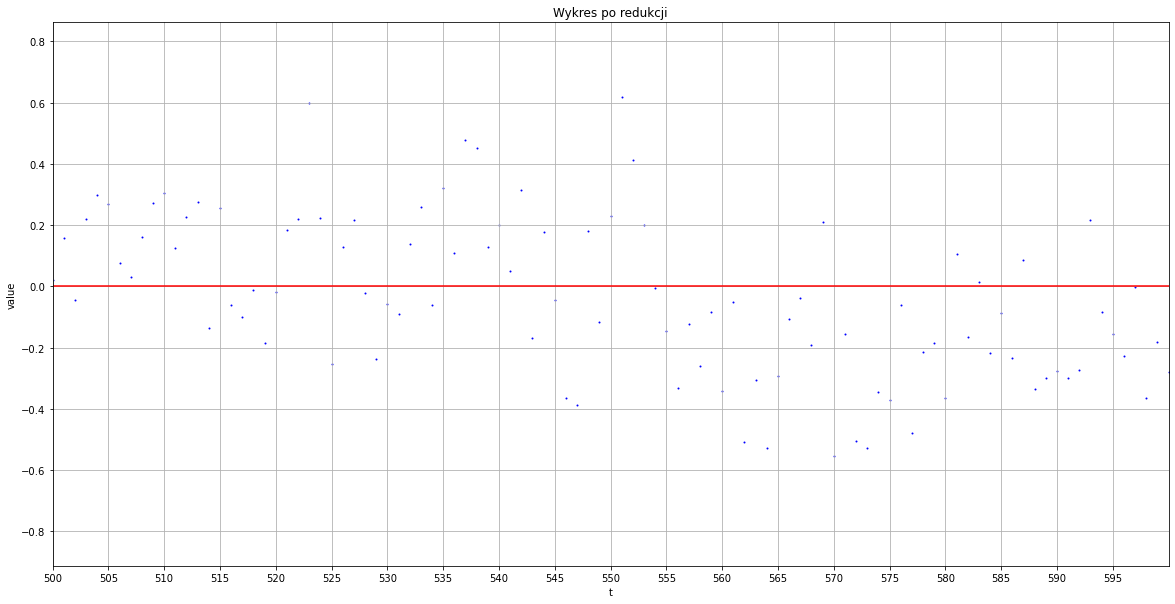

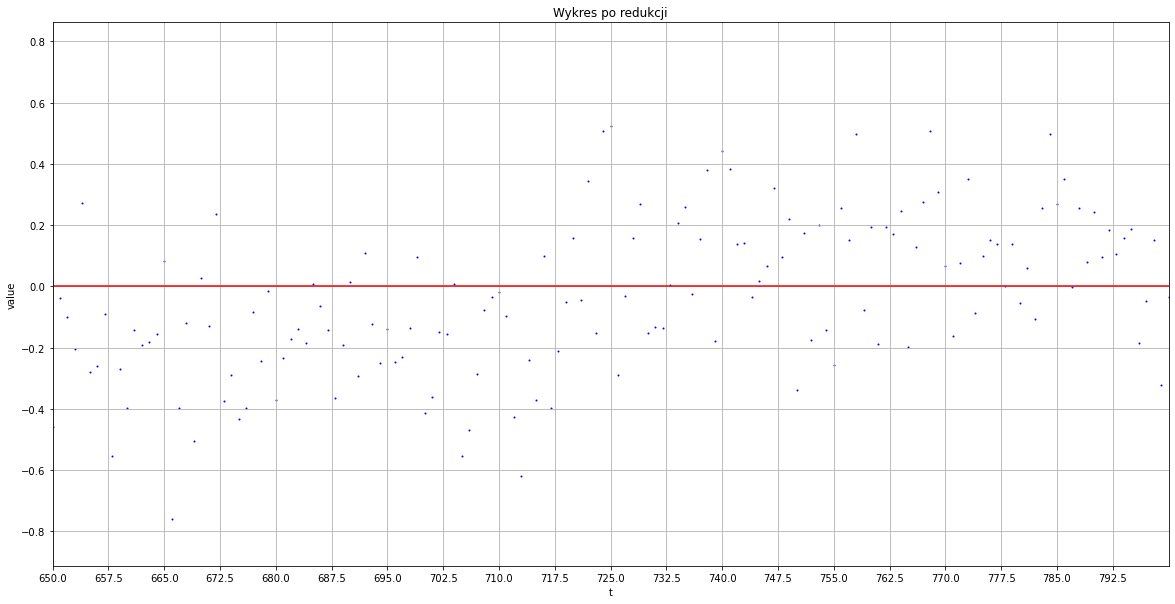

In [136]:
limit(50,200,Y_plot,X1)
limit(250,380,Y_plot,X1)
limit(500,600,Y_plot,X1)
limit(650,800,Y_plot,X1)

In [ ]:
X = X1[330:468]
Y = Y1[330:468]

Y_plot_2, values_predict_2 = p_lr_red(X,Y)

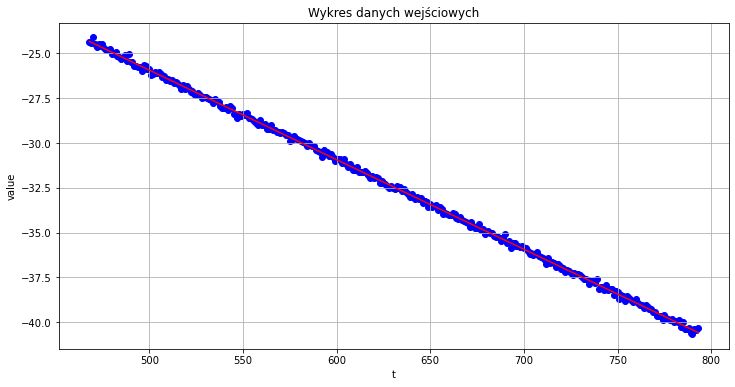

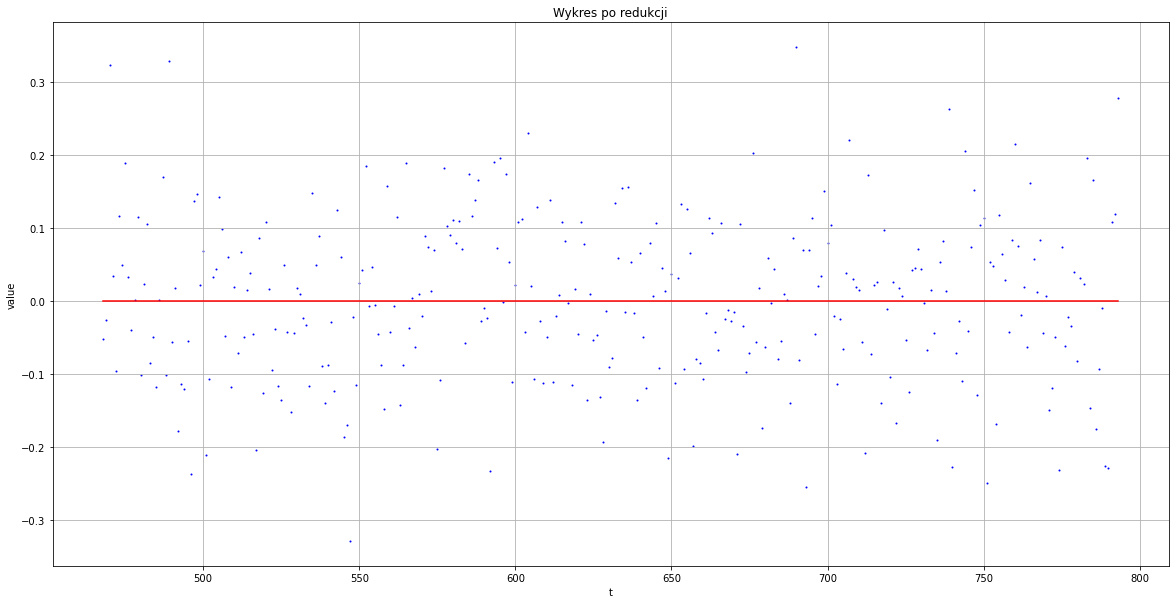

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[-0.04993733]
-0.9703382287296662
----------------------------------------------------------------------


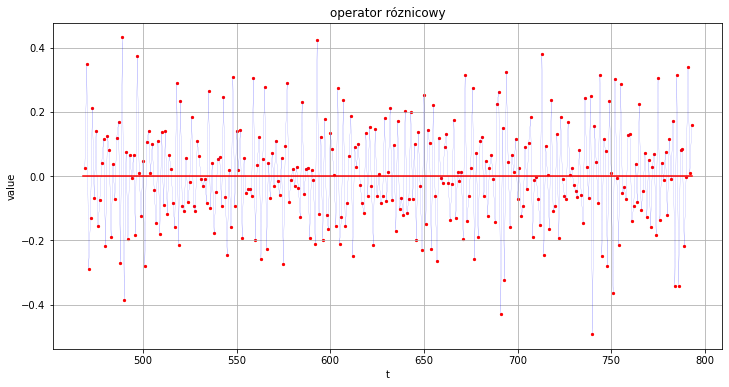

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
21    0.431753
dtype: float64
272   -0.491781
dtype: float64
----------------------------------------------------------------------


In [74]:
X = X1[468:794]
Y = Y1[468:794]

Y_plot_3, values_predict_3 = p_lr_red(X,Y)

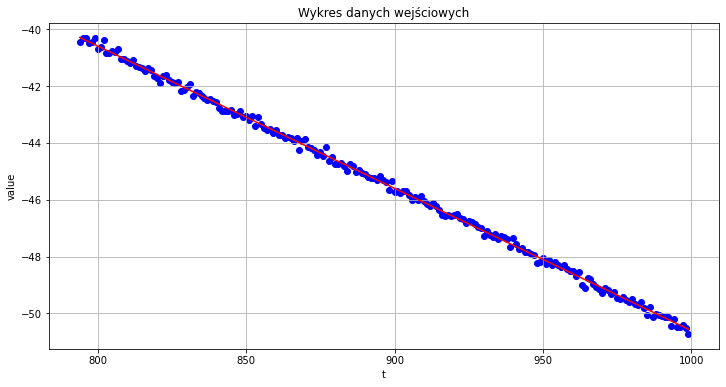

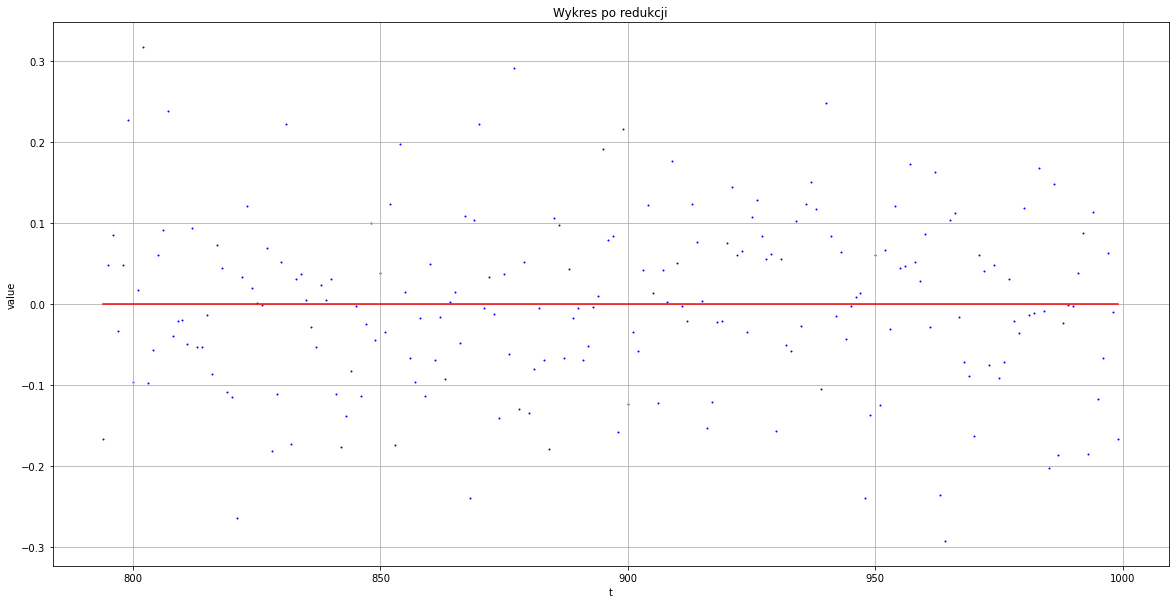

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[-0.05007179]
-0.536045645579236
----------------------------------------------------------------------


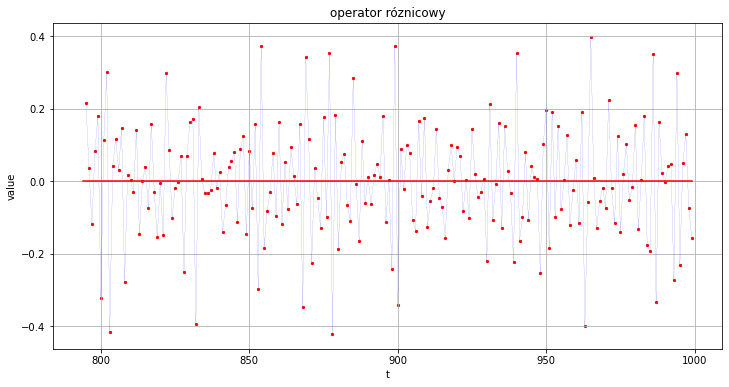

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
171    0.397129
dtype: float64
84   -0.421921
dtype: float64
----------------------------------------------------------------------


In [75]:
X = X1[794:]
Y = Y1[794:]

Y_plot_4, values_predict_4 = p_lr_red(X,Y)

In [76]:
roznica = values_predict[330]-values_predict_2[0]
roznica2 = values_predict[468]- values_predict_3[0]
roznica3 = values_predict[794]- values_predict_4[0]
roznica,roznica2,roznica3

(0.7042372062813733, 0.3607414518186509, -0.24924618610209848)

In [73]:
list_skokow = [330,468,794]
wartosci_skokow = [Y2[y]-Y2[x-1] for x, y in zip(lista_skokow, lista_skokow)]
wartosci_skokow

[-0.1267390000000006, -0.21619400000000155, 0.4302720000000022]

In [47]:
array = np.hstack((Y1[0:330], Y1[330:468]+roznica, Y1[468:793]+roznica2, Y1[793:]+roznica3))

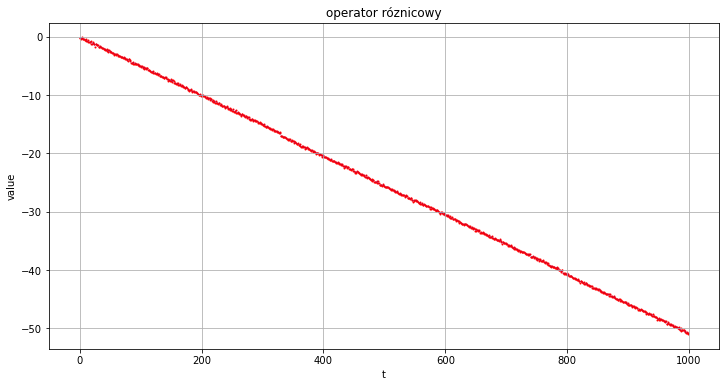

In [48]:
plt.figure(figsize=(12,6))
plt.title('operator róznicowy')
plt.xlabel('t')
plt.ylabel('value')
plt.plot(X1,array,'-', color = 'blue', linewidth = 0.1)
plt.scatter(X1,array, color = 'red', s = 1)
# plt.plot(X1,np.linspace(0,0,len(X1)), color = 'r')
plt.grid()

plt.show()

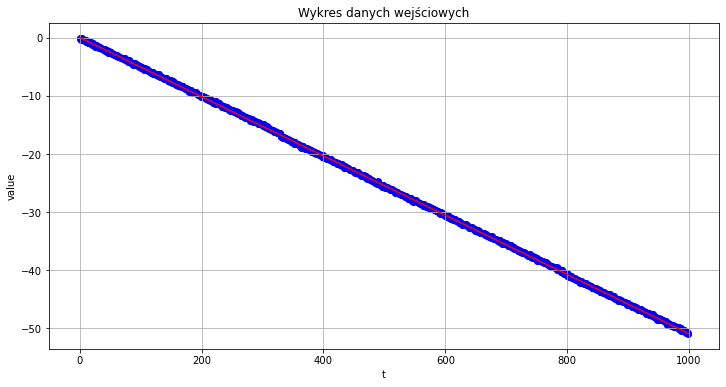

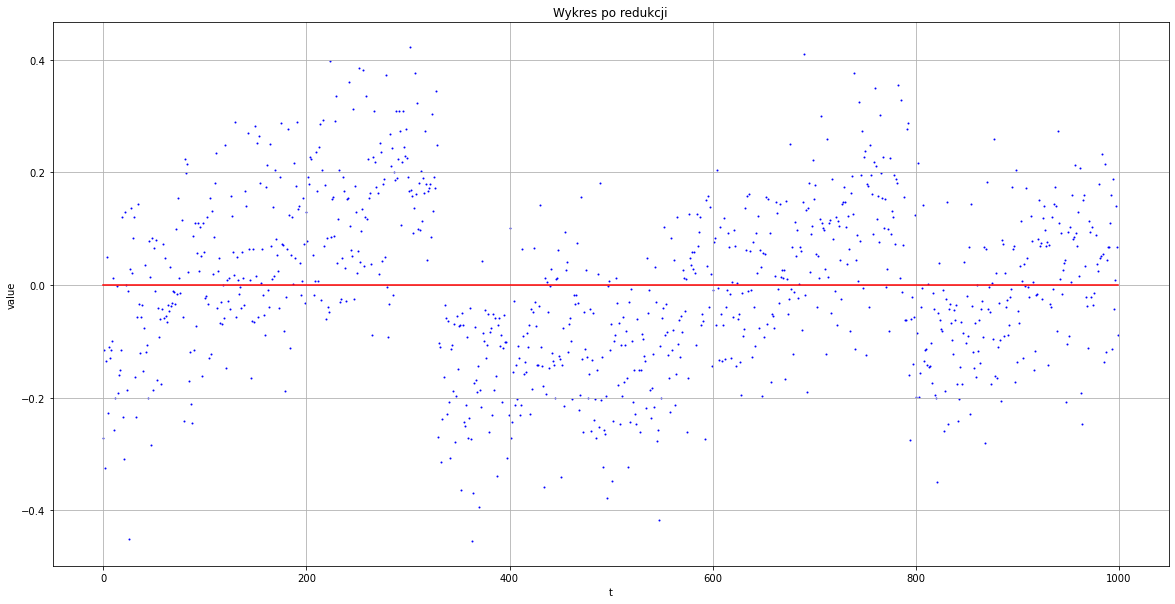

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[-0.05098264]
0.04786971534794304
----------------------------------------------------------------------


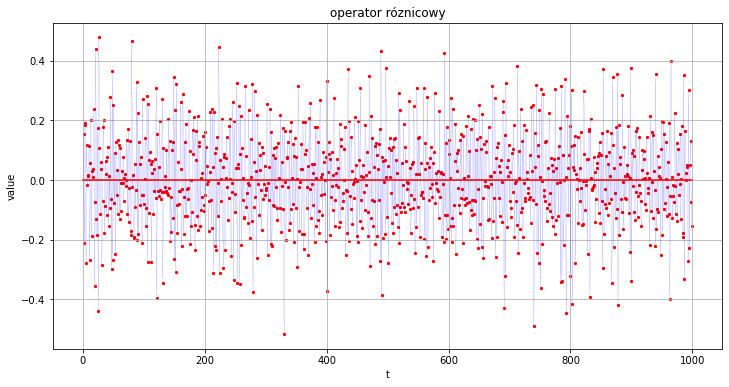

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
26    0.478458
dtype: float64
330   -0.51725
dtype: float64
----------------------------------------------------------------------


In [49]:
Y_plot_5, values_predict_5 = p_lr_red(X1,array)

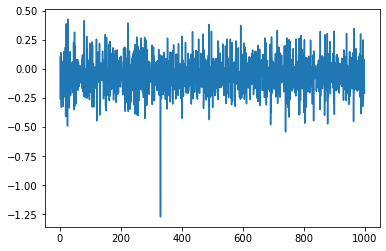

In [50]:
a = np.array([y-x for x,y in zip(Y1, Y1[1:])])
plt.plot(X1[1:], a)

In [51]:
Y2 = np.loadtxt('test_j1.txt')
X2 = np.arange(0,len(Y2))

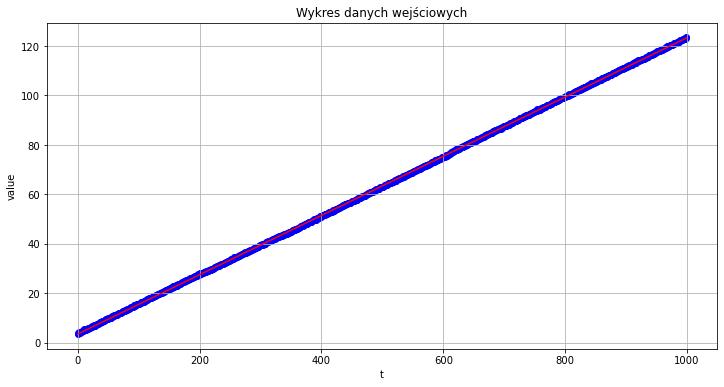

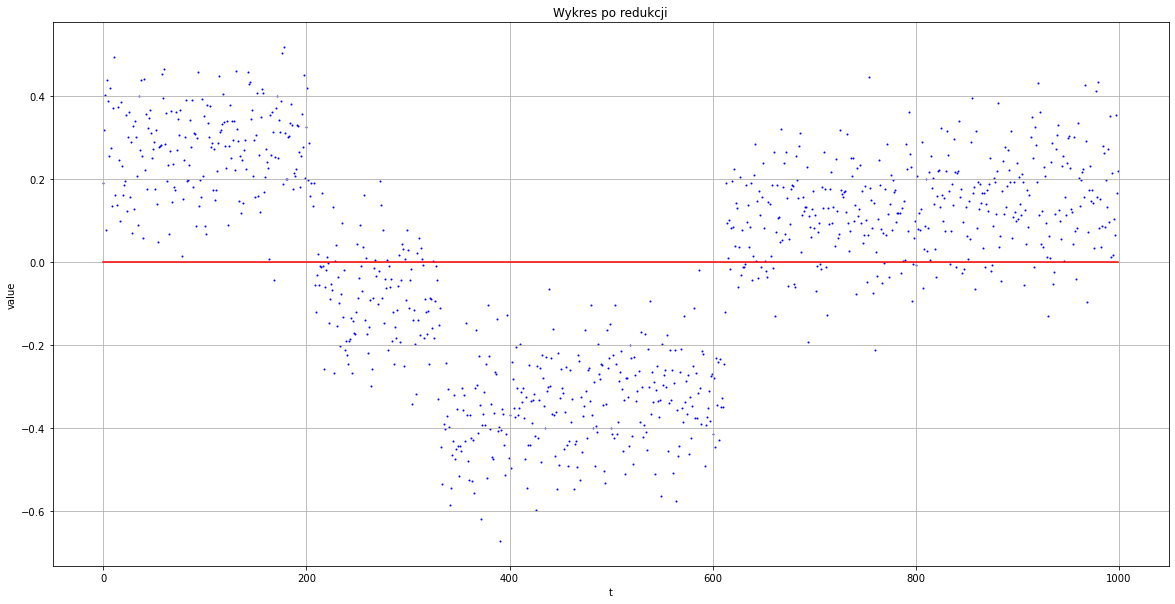

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[0.11976095]
3.5961745224911326
----------------------------------------------------------------------


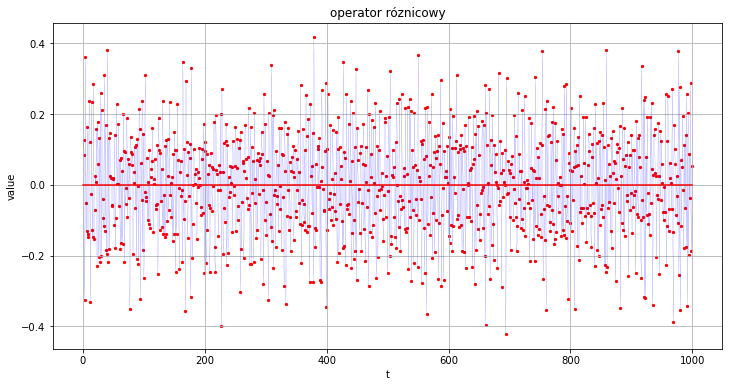

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
379    0.416875
dtype: float64
694   -0.421644
dtype: float64
----------------------------------------------------------------------


In [61]:
Y_plot2, values_predict2 = p_lr_red(X2,Y2)

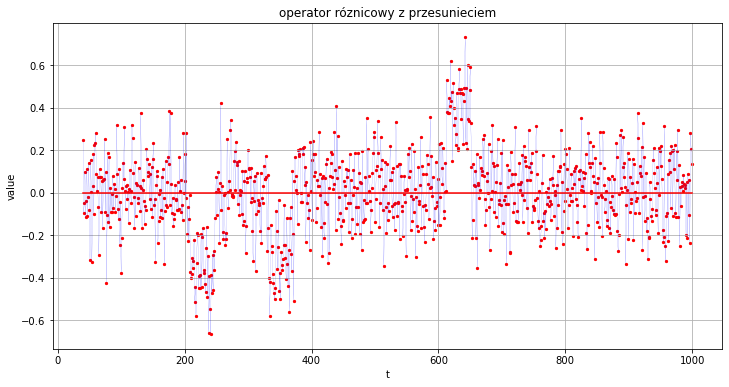

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
642    0.729353
dtype: float64
241   -0.664904
dtype: float64
----------------------------------------------------------------------


In [66]:
przesuniecie(X2,Y_plot2,40)

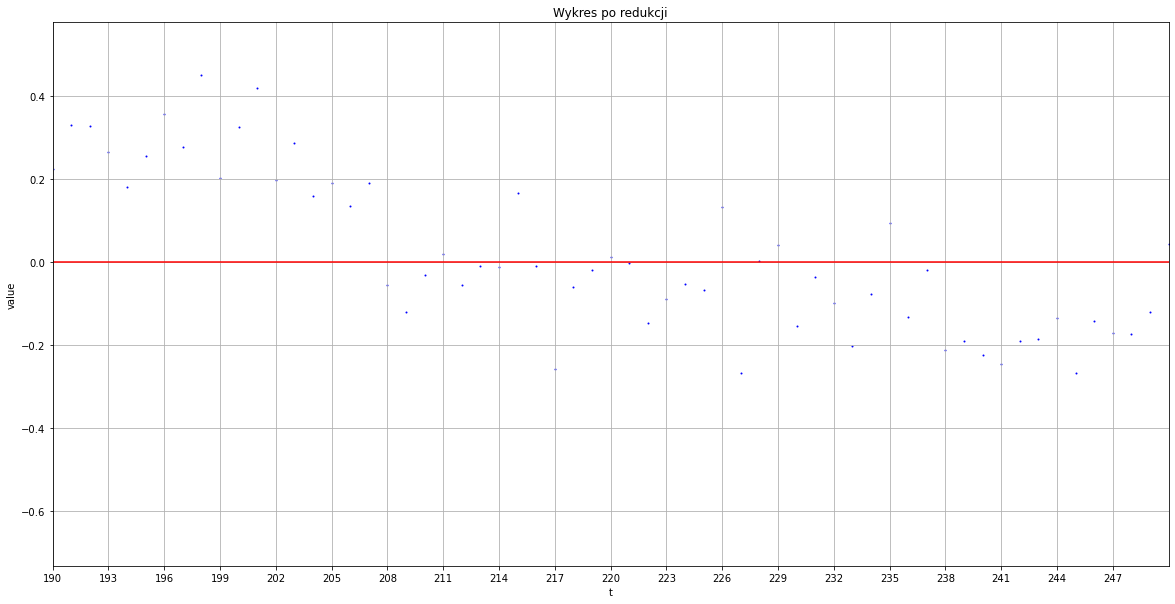

In [60]:
limit(190,250,Y_plot2, X2)

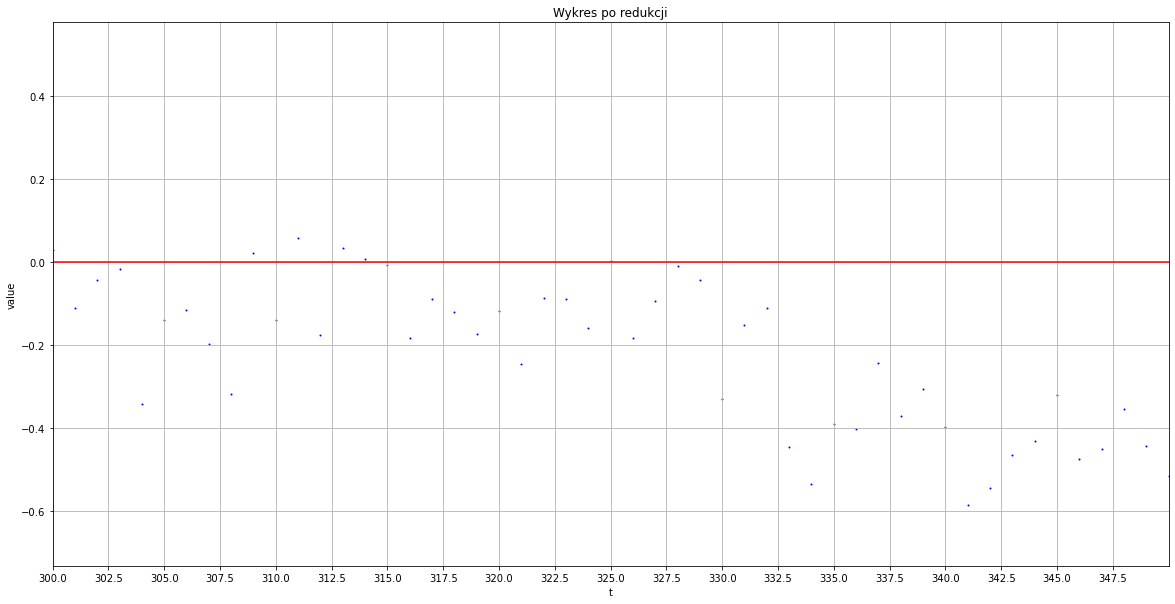

In [62]:
limit(300,350,Y_plot2, X2)

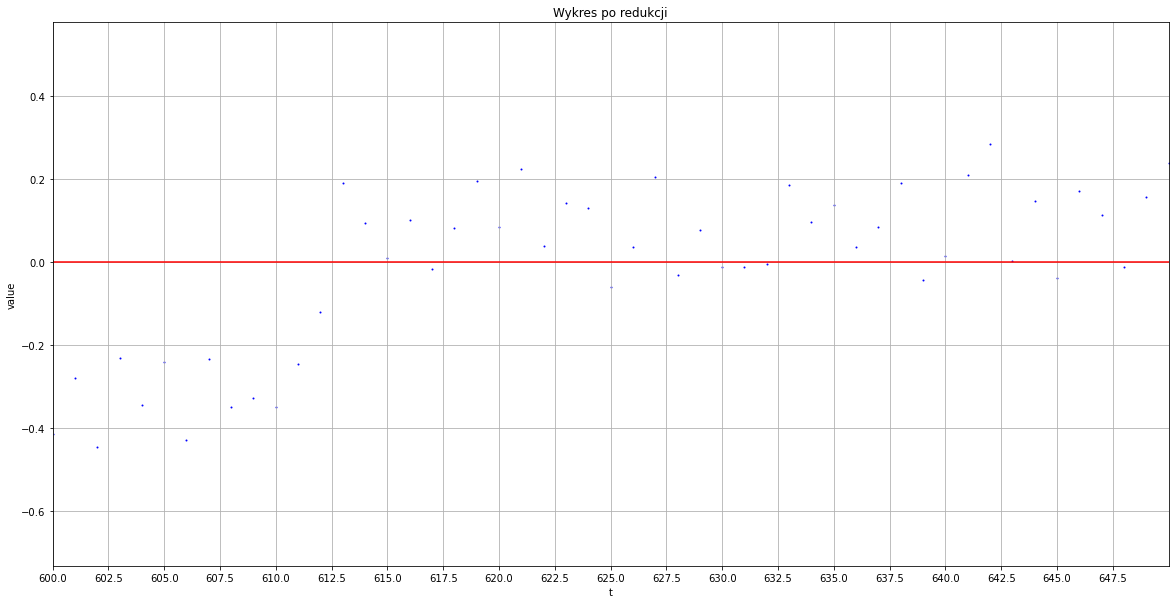

In [63]:
limit(600,650,Y_plot2, X2)

In [71]:
lista_skokow = [208,333,613]
wartosci_skokow = [Y2[y]-Y2[x-1] for x, y in zip(lista_skokow, lista_skokow)]


[-0.1267390000000006, -0.21619400000000155, 0.4302720000000022]

In [92]:
def przedzialy(wartosci, X,Y):
    y_predict_0, y_plot_0 = p_lr_red(X,Y)
    y_predict_list = []
    y_plot_list = []
    wart = 0
    for i in wartosci:     
        Y2 = Y[wart:i]
        X2 = X[wart:i]
        Y_plot, values_predict = p_lr_red(X2,Y2)
        y_predict_list.append(values_predict)
        y_plot_list.append(Y_plot)
        wart = i
        
    lista_wartosci_skokow = [y_predict_0[value] -  i[0] for value, i in zip(wartosci, y_predict_list)]
    return y_predict_list, y_plot_list, lista_wartosci_skokow

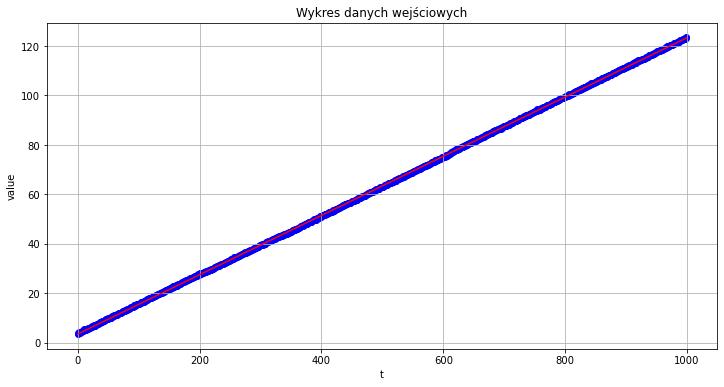

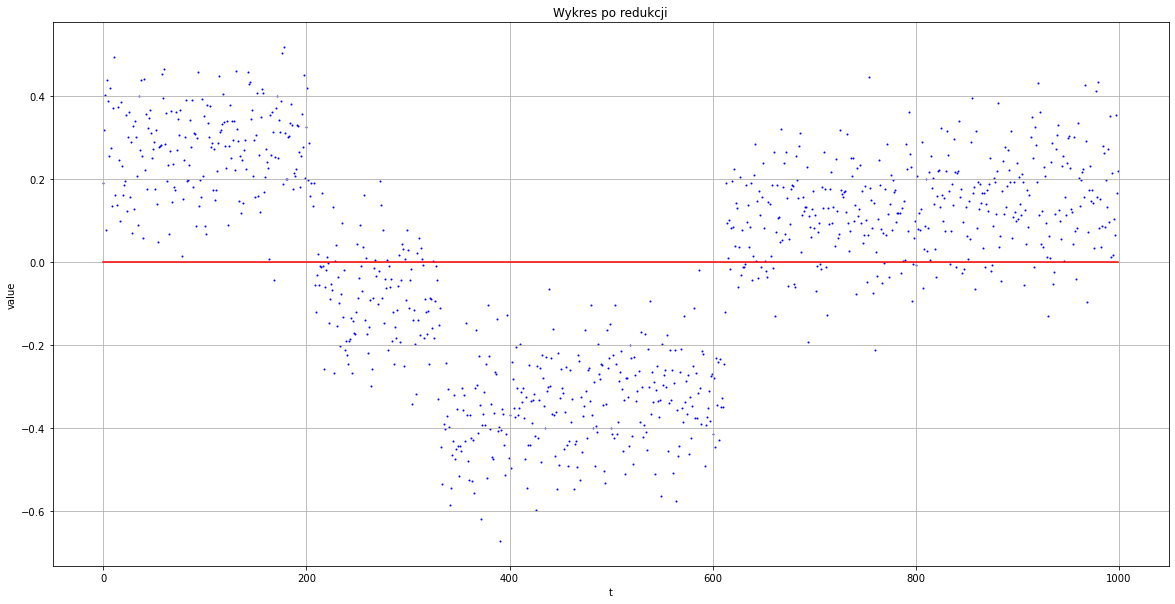

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[0.11976095]
3.5961745224911326
----------------------------------------------------------------------


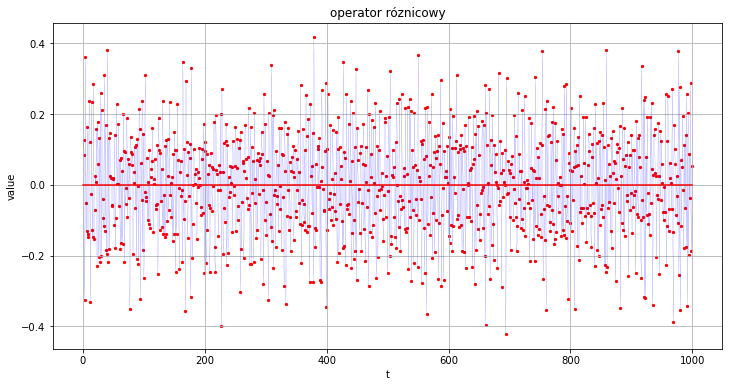

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
379    0.416875
dtype: float64
694   -0.421644
dtype: float64
----------------------------------------------------------------------


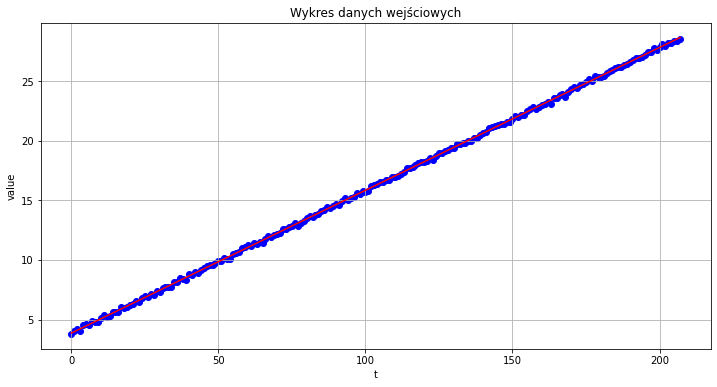

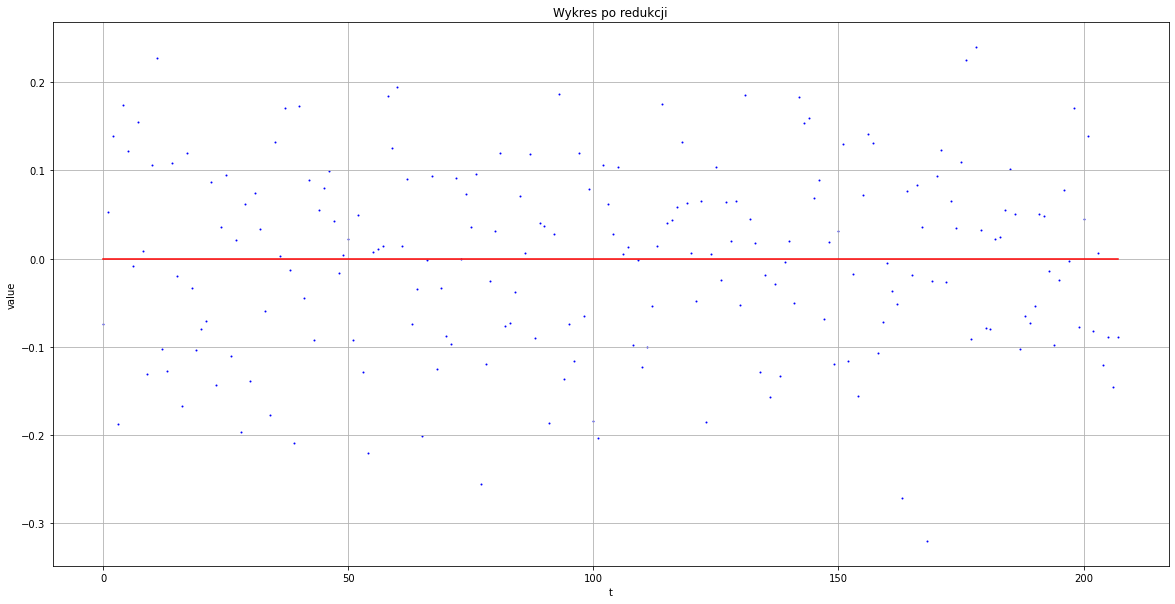

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[0.11983951]
3.8595304336400442
----------------------------------------------------------------------


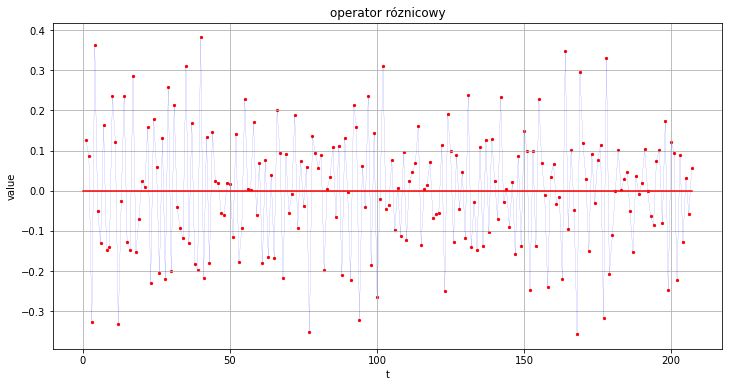

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
40    0.38169
dtype: float64
168   -0.356578
dtype: float64
----------------------------------------------------------------------


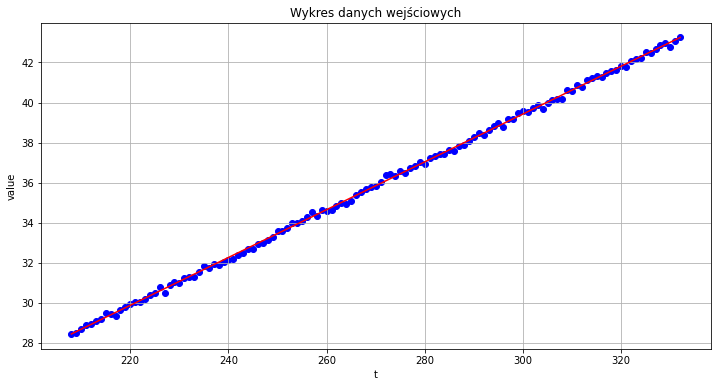

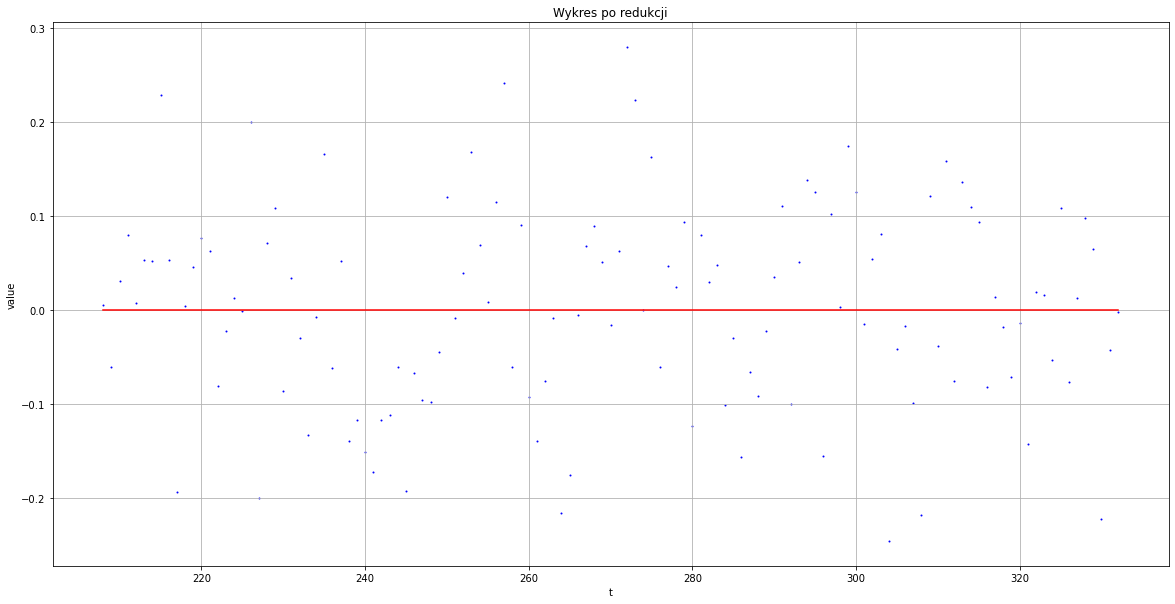

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[0.11937138]
3.6157005731612912
----------------------------------------------------------------------


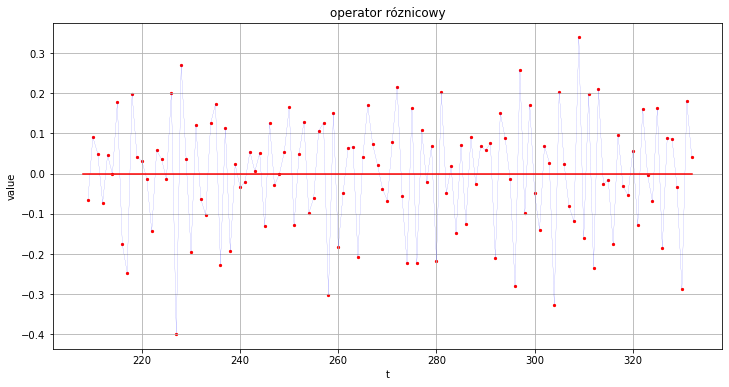

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
101    0.338594
dtype: float64
19   -0.399057
dtype: float64
----------------------------------------------------------------------


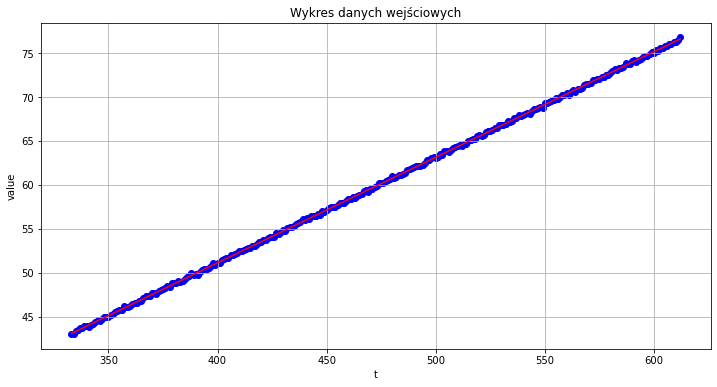

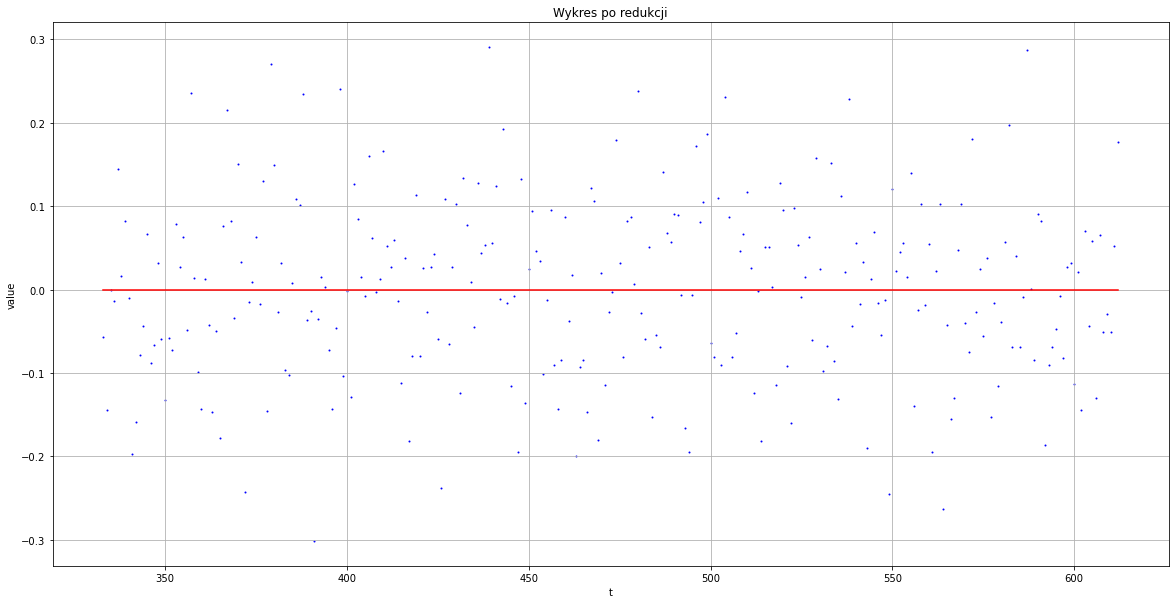

----------------------------------------------------------------------
PARAMETRY MODELU REGRESJI
[0.12009284]
3.0944192627909146
----------------------------------------------------------------------


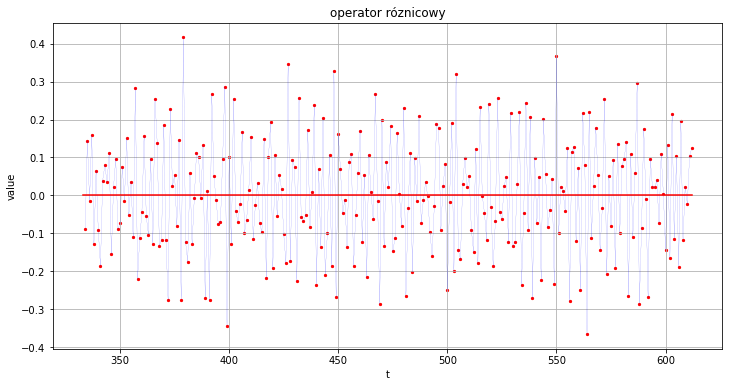

----------------------------------------------------------------------
WARTOŚCI NAJMNIEJSZE ORAZ NAJWIĘKSZE I ICH INDEKSY
46    0.416543
dtype: float64
231   -0.365681
dtype: float64
----------------------------------------------------------------------


[-0.1267390000000006, -0.21619400000000155, 0.4302720000000022]

In [94]:
y_predict_list, y_plot_list, lista_wartosci_skokow = przedzialy(lista_skokow, X2, Y2)
wartosci_skokow